***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../data/dados.csv', delimiter=',')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1.2 Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas

In [10]:
sorted(df['Anos de Estudo'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas

In [11]:
df['Sexo'].unique()

array([0, 1])

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.

In [12]:
df.Idade.min()

13

#### <font color='red'>Observação</font>
***
> A variável idade pode ser classificada de três formas distintas:
> 1. <b>QUANTITATIVA DISCRETA</b> - quando representa anos completos (números inteiros);
> 2. <b>QUANTITATIVA CONTÍNUA</b> - quando representa a idade exata, sendo representado por frações de anos; e
> 3. <b>QUALITATIVA ORDINAL</b> - quando representa faixas de idade.

### Classificação de uma variável
<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img001.png' width='70%'>

# <font color=green>2 DISTRIBUIÇÃO DE FREQUÊNCIAS</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***
<p>Variaveis naturalmente categorizadas</p>

### Método 1

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [13]:
frequencia = df['Sexo'].value_counts()
frequencia

Sexo
0    53250
1    23590
Name: count, dtype: int64

In [14]:
# Porcentagem
frequencia_normalized = df['Sexo'].value_counts(normalize = True) * 100
frequencia_normalized

Sexo
0    69.299844
1    30.700156
Name: proportion, dtype: float64

In [15]:
dist_freq_qualy = pd.DataFrame({'Frequencia': frequencia,
                                'Porcentagem (%)': frequencia_normalized})

dist_freq_qualy

,Frequencia,Porcentagem (%)
Sexo,,
0,53250,69.299844
1,23590,30.700156


In [16]:
dist_freq_qualy.rename(index = {0: 'masculino', 1: 'feminino'}, inplace = True)
dist_freq_qualy

,Frequencia,Porcentagem (%)
Sexo,,
masculino,53250,69.299844
feminino,23590,30.700156


### Método 2

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

In [17]:
df.Renda.min()

0

In [18]:
df.Renda.max()

200000

In [19]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [20]:
labels = ['E', 'D', 'C', 'B', 'A']

### Passo 2 - Criar a tabela de frequências

https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

In [21]:
frequencia = pd.value_counts(pd.cut(x = df.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True))

/tmp/ipykernel_31763/3175327235.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(pd.cut(x = df.Renda,


In [22]:
frequencia_normalized = pd.value_counts(pd.cut(x = df.Renda,
        bins = classes,
        labels = labels,
        include_lowest = True),
        normalize=True) * 100

/tmp/ipykernel_31763/1966258684.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia_normalized = pd.value_counts(pd.cut(x = df.Renda,


In [23]:
dist_freq_quant = pd.DataFrame({'Frequencia': frequencia,
                                'Porcentagem (%)': frequencia_normalized})
dist_freq_quant.sort_index(ascending=False)

,Frequencia,Porcentagem (%)
Renda,,
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


In [24]:
classes = [df.Altura.min(), 1.65, 1.75, df.Altura.max()]
labels = ['1 - Baixa', '2 - Média', '3 - Alta']

frequencia = pd.value_counts(
    pd.cut(
        x = df.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    )
)

percentual = pd.value_counts(
    pd.cut(
        x = df.Altura,
        bins = classes,
        labels = labels,
        include_lowest = True
    ), normalize = True
) * 100

dist_freq_altura = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_altura.rename_axis('Estaturas', axis= 'columns', inplace = True)

dist_freq_altura.sort_index(ascending = True, inplace = True)

dist_freq_altura

/tmp/ipykernel_31763/4203241904.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(
/tmp/ipykernel_31763/4203241904.py:13: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(


Estaturas,Frequência,Porcentagem (%)
Altura,,
1 - Baixa,20529,26.716554
2 - Média,36162,47.061426
3 - Alta,20149,26.222020


## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

### Importando bibliotecas

http://www.numpy.org/

In [25]:
import numpy as np

### Passo 1 - Difinindo o número de classes

#### Regra de Sturges

# $$k = 1 + \frac {10}{3}\log_{10}n$$

In [26]:
n = df.shape[0]
n

76840

In [27]:
k = 1 + (10/3) * np.log10(n)
k = int(k.round(0))
k

17

In [28]:
frequencia = pd.value_counts(pd.cut(
    x=df.Renda,
    bins=17
), sort=False)
frequencia

/tmp/ipykernel_31763/207457012.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencia = pd.value_counts(pd.cut(


Renda
(-200.0, 11764.706]         75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: count, dtype: int64

In [29]:
percentual = pd.value_counts(pd.cut(
    x=df.Renda,
    bins=17
), sort=False, normalize=True) * 100
percentual

/tmp/ipykernel_31763/846196804.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  percentual = pd.value_counts(pd.cut(


Renda
(-200.0, 11764.706]         98.378449
(11764.706, 23529.412]       1.330036
(23529.412, 35294.118]       0.219938
(35294.118, 47058.824]       0.024727
(47058.824, 58823.529]       0.020822
(58823.529, 70588.235]       0.006507
(70588.235, 82352.941]       0.005206
(82352.941, 94117.647]       0.001301
(94117.647, 105882.353]      0.007808
(105882.353, 117647.059]     0.000000
(117647.059, 129411.765]     0.001301
(129411.765, 141176.471]     0.000000
(141176.471, 152941.176]     0.000000
(152941.176, 164705.882]     0.000000
(164705.882, 176470.588]     0.000000
(176470.588, 188235.294]     0.000000
(188235.294, 200000.0]       0.003904
Name: proportion, dtype: float64

### Passo 2 - Criar a tabela de frequências

In [30]:
dist_freq_renda_Fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)

dist_freq_renda_Fixa.rename_axis('Renda', axis= 'columns', inplace = True)
dist_freq_renda_Fixa

Renda,Frequência,Porcentagem (%)
Renda,,
"(-200.0, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808


## <font color=green>2.4 Histograma</font>
***

O <b>HISTOGRAMA</b> é a representação gráfica de uma distribuição de frequências. É uma gráfico formado por um conjunto de retângulos colocados lado a lado, onde a área de cada retângulo é proporcional à frequência da classe que ele representa.

### Importando a biblioteca

https://seaborn.pydata.org/

In [31]:
import seaborn as sns

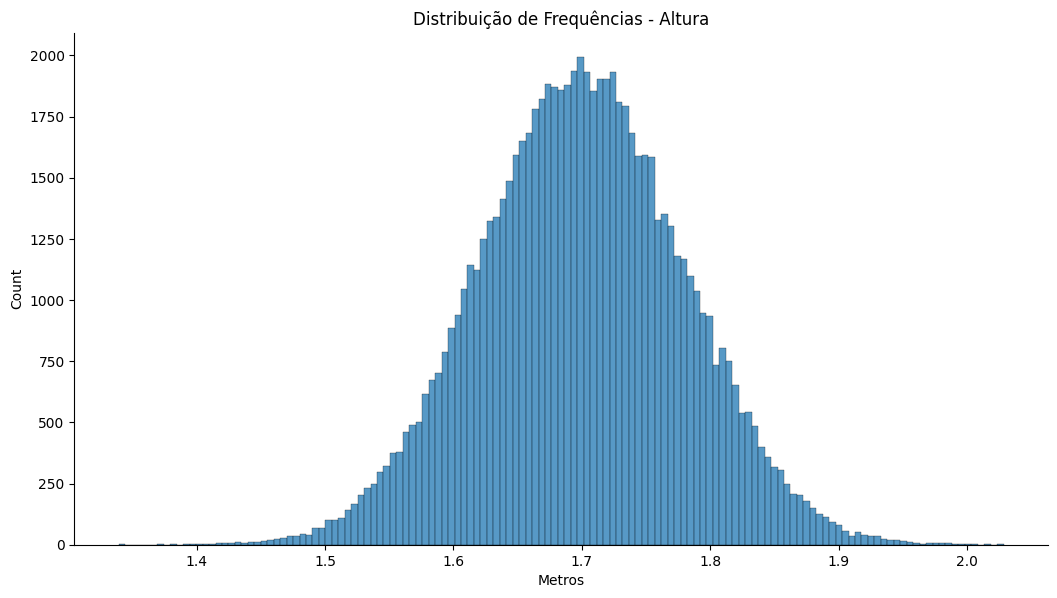

In [32]:
ax = sns.displot(df.Altura, kde = False)
ax.figure.set_size_inches(12,6)
ax.set(title ="Distribuição de Frequências - Altura", xlabel='Metros') 
ax

# <font color=green>3 MEDIDAS DE TENDÊNCIA CENTRAL</font>
***

## <font color=green>3.1 Média aritmética</font>
***

É representada por $\mu$ quando se refere à população e por $\bar{X}$ quando se refere à amostra

# $$\mu = \frac 1n\sum_{i=1}^{n}X_i$$

onde 

$n$ = número de observações (registros)

$X_i$ = valor da i-ésima observação (registro)

In [33]:
df.Renda.mean()

2000.3831988547631

In [34]:
df.groupby('Sexo')['Renda'].mean()

Sexo
0    2192.441596
1    1566.847393
Name: Renda, dtype: float64

## <font color=green>3.2 Mediana</font>
***

Para obtermos a mediana de uma conjunto de dados devemos proceder da seguinte maneira:
1. Ordenar o conjunto de dados;
2. Identificar o número de observações (registros) do conjunto de dados ($n$);
3. Identicar o elemento mediano:

> Quando $n$ for ímpar, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n+1}2$$

> Quando $n$ for par, a posição do elemento mediano será obtida da seguinte forma:


# $$Elemento_{Md} = \frac{n}2$$

4. Obter a mediana:

> Quando $n$ for ímpar:


# $$Md = X_{Elemento_{Md}}$$

> Quando $n$ for par:


# $$Md = \frac{X_{Elemento_{Md}} + X_{Elemento_{Md}+1}}2$$
***

### Exemplo 1 - n ímpar

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img002.png' width='40%' style="float:left">

### Exemplo 2 - n par

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img003.png' width='50%' style="float:left">

### Obtendo a mediana em nosso dataset

In [35]:
df.Renda.median()

1200.0

## <font color=green>3.3 Moda</font>
***

Pode-se definir a moda como sendo o valor mais frequente de um conjunto de dados. A moda é bastante utilizada para dados qualitativos.

### Obtendo a moda em nosso dataset

In [36]:
df.Renda.mode()

0    788
Name: Renda, dtype: int64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

# <font color=green>4 MEDIDAS SEPARATRIZES</font>
***

## <font color=green>4.1 Quartis, decis e percentis</font>
***

Há uma série de medidas de posição semelhantes na sua concepção à mediana, embora não sejam medidas de tendência central. Como se sabe, a mediana divide a distribuição em duas partes iguais quanto ao número de elementos de cada parte. Já os quartis permitem dividir a distribuição em quatro partes iguais quanto ao número de elementos de cada uma; os decis em dez partes e os centis em cem partes iguais.

In [37]:
df.Altura.quantile([0.25, 0.50, 0.75])

0.25    1.645785
0.50    1.699325
0.75    1.753062
Name: Altura, dtype: float64

In [38]:
df.Altura.quantile([i / 10 for i in range(1, 10)])

0.1    1.597740
0.2    1.632289
0.3    1.657775
0.4    1.679055
0.5    1.699325
0.6    1.719569
0.7    1.740910
0.8    1.766779
0.9    1.802073
Name: Altura, dtype: float64

## <font color=green>4.2 Box-plot</font>
***

O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes (outliers). A posição central é dada pela mediana e a dispersão por $IIQ$. As posições relativas de $Q1$, $Mediana$ e $Q3$ dão uma noção da simetria da distribuição. Os comprimentos das cauda são dados pelas linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img005.png' width='65%'>

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img006.png' width='80%'>

# <font color=green>5 MEDIDAS DE DISPERSÃO</font>
***

Embora as medidas de posição forneçam uma sumarização bastante importante dos dados, elas podem não ser suficientes para caracterizar conjuntos distintos, especialmente quando as observações de determinada distribuição apresentarem dados muito dispersos.

## <font color=green>5.1 Desvio médio absoluto</font>
***


# $$DM = \frac 1n\sum_{i=1}^{n}|X_i-\bar{X}|$$


In [39]:
# desvio = df[['Renda']].mad()
# Deprecated

## <font color=green>5.2 Variância</font>
***

### Variância

A variância é construída a partir das diferenças entre cada observação e a média dos dados, ou seja, o desvio em torno da média. No cálculo da variância, os desvios em torno da média são elevados ao quadrado.

### Variância populacional

# $$\sigma^2 = \frac 1n\sum_{i=1}^{n}(X_i-\mu)^2$$

### Variância amostral

# $$S^2 = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2$$

In [40]:
variancia = df.Altura.var()
variancia

0.006354868656686795

#### <font color='red'>Observação</font>

O resultado acima é metros^2, portanto é complicado de analisar

## <font color=green>5.3 Desvio padrão</font>
***

Uma das restrições da variância é o fato de fornecer medidas em quadrados das unidades originais - a variância de medidas de comprimento, por exemplo, é em unidades de área. Logo, o fato de as unidades serem diferentes dificulta a comparação da dispersão com as variáveis que a definem. Um modo de eliminar essa dificuldade é considerar sua raiz quadrada.

### Desvio padrão populacional

# $$\sigma = \sqrt{\frac 1n\sum_{i=1}^{n}(X_i-\mu)^2} \Longrightarrow \sigma = \sqrt{\sigma^2}$$

### Desvio padrão amostral

# $$S = \sqrt{\frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})^2} \Longrightarrow S = \sqrt{S^2}$$

In [41]:
desvio_padrao = df.Altura.std()
desvio_padrao

0.07971743006825292